In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math


/home/sbsatter/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/sbsatter/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/sbsatter/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/sbsatter/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [6]:
num_house = 160
np.random.seed(42)
house_sizes = np.random.randint(low=1000, high=3500, size=num_house)
np.random.seed(42)
house_prices = house_sizes * 100 + np.random.randint(low=20000, high=70000, size=num_house)

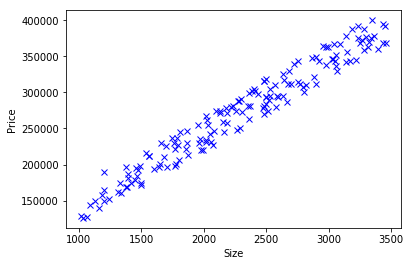

In [7]:
plt.plot(house_sizes, house_prices, 'bx')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

In [10]:
def normalize(array):
    return (array - array.mean())/array.std()

In [58]:
ratio = 0.8 # ratio of training examples to total data 
training_set_size = math.floor(ratio * num_house)
test_set_size = num_house - training_set_size
training_set, test_set = {}, {}

In [59]:
size_train = np.asarray(house_sizes[:training_set_size])
price_train = np.asarray(house_prices[:training_set_size])
size_test = np.asarray(house_sizes[training_set_size:])
price_test = np.asarray(house_prices[training_set_size:])

In [60]:
size_train_norm = normalize(size_train)
price_train_norm = normalize(price_train)
size_test_norm = normalize(size_test)
price_test_norm = normalize(price_test)

In [61]:
tf_house_size = tf.placeholder('float', name = 'house_size')
tf_price = tf.placeholder('float', name = 'price')
tf_size_factor = tf.Variable(np.random.randn(), name = 'size_factor')
tf_price_offset = tf.Variable(np.random.randn(), name = 'price_offset')

In [62]:
# Learn the inference function: Price = size * size_factor + price_offset

tf_price_pred = tf.add(tf.multiply(tf_house_size, tf_size_factor), tf_price_offset)

In [63]:
# Loss calculator
tf_cost = tf.reduce_sum(tf.squared_difference(tf_price, tf_price_pred))/(2 * training_set_size)

In [64]:
learning_rate = 0.1

In [65]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(tf_cost)

In [66]:
init = tf.global_variables_initializer()

In [67]:
num_iterations = 50

In [74]:
sess = tf.Session()
sess.run(init)
for i in range(num_iterations):
    for (x,y) in zip(size_train_norm, price_train_norm):
        sess.run(optimizer, feed_dict={tf_house_size: x, tf_price:y})

    if (i+1) % 2 == 0:
        cost = sess.run(tf_cost, feed_dict={tf_price: price_train_norm, tf_house_size: size_train_norm})
        size_factor = sess.run(tf_size_factor)
        price_offset = sess.run(tf_price_offset)
        print('#### Iteration # ',i, '\nCost: ', cost, '\nSize Factor: ', size_factor, '\nPrice Offset', price_offset)


#### Iteration #  1 
Cost:  0.84121716 
Size Factor:  -0.0903013 
Price Offset -0.7052284
#### Iteration #  3 
Cost:  0.57014954 
Size Factor:  0.103959985 
Price Offset -0.5772232
#### Iteration #  5 
Cost:  0.3885471 
Size Factor:  0.26297233 
Price Offset -0.47243813
#### Iteration #  7 
Cost:  0.26688552 
Size Factor:  0.39313158 
Price Offset -0.38665977
#### Iteration #  9 
Cost:  0.18538381 
Size Factor:  0.49967334 
Price Offset -0.3164415
#### Iteration #  11 
Cost:  0.13078794 
Size Factor:  0.5868829 
Price Offset -0.2589604
#### Iteration #  13 
Cost:  0.09421787 
Size Factor:  0.65826774 
Price Offset -0.21190622
#### Iteration #  15 
Cost:  0.0697237 
Size Factor:  0.71669954 
Price Offset -0.1733874
#### Iteration #  17 
Cost:  0.05331909 
Size Factor:  0.7645295 
Price Offset -0.14185579
#### Iteration #  19 
Cost:  0.042333625 
Size Factor:  0.80368066 
Price Offset -0.11604381
#### Iteration #  21 
Cost:  0.03497809 
Size Factor:  0.83572763 
Price Offset -0.09491396


In [73]:
train_size_mean = size_train_norm.mean()
train_size_std = size_train_norm.std()
train_price_mean = price_train_norm.mean()
train_price_std = price_train_norm.std()

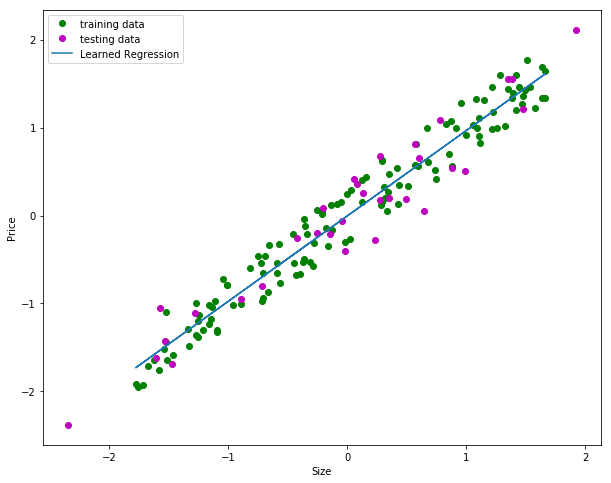

In [75]:
plt.rcParams['figure.figsize'] = [10,8]
plt.figure()
plt.xlabel('Size')
plt.ylabel('Price')
plt.plot(size_train_norm, price_train_norm, 'go', label='training data')
plt.plot(size_test_norm, price_test_norm, 'mo', label='testing data')
plt.plot(size_train_norm * train_size_std + train_size_mean, \
         (sess.run(tf_size_factor) * size_train_norm + sess.run(tf_price_offset)) * train_price_std + train_price_mean,\
        label='Learned Regression')
plt.legend(loc=2) # upper left
plt.show()
sess.close()